# Project: Investigate a Dataset - No Show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li></ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in
Brazil and is focused on the question of whether or not patients show up
for their appointment. A number of characteristics about the patient are
included in each row.
<li> ‘ScheduledDay’ tells us on what day the patient set up their appointment. </li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up</li>

### Research Questions
I would be curious to answer the following questions regarding this dataset. Asking these questions will shape the analysis I will carry out. 
1. What is the proportion of patients who miss their appointments?
2. Is illness a factor on whether a patient will show up?
4. Do SMS Reminders work to avoid no-shows?

In [4]:
# These are the import statements for all the packages I will be using
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os

<a id='wrangling'></a>
## Data Wrangling

In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

In [5]:
# Loading the data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

### General Properties

In [6]:
# Number of rows and columns in the data

df.shape

(110527, 14)

In [7]:
# The first 5 rows of the data 

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#Summary of the data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Check for data type and number of null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




### Data Cleaning

In [10]:
# I have decided to drop Patient ID and Appointment ID, as both of these columns will not contribute to the analysis.

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [11]:
# Replace the name of the No-Show to No_Show and fix the other typos

df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [12]:
print(df.columns)

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMS_received', 'No_show'],
      dtype='object')


In [13]:
# Replace No for Present and Yes for Absent

df['No_show'].replace({'No':'Present', 'Yes':'Absent'}, inplace=True)
df['Alcoholism'].replace({0:'No', 1:'Yes'}, inplace=True)
df['Hypertension'].replace({0:'No', 1:'Yes'}, inplace=True)
df['Diabetes'].replace({0:'No', 1:'Yes'}, inplace=True)

In [14]:
# Check the age range for correctness

df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

In [15]:
# Drop the age rows that are less than 0 and more than 99 and then check that it worked

df.drop(df[(df.Age<0)|(df.Age>99)].index, inplace = True)
df['Age'].unique()

array([62, 56,  8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46,
        4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71,
       49, 78, 31, 58, 27,  6,  2, 11,  7,  0,  3,  1, 69, 68, 60, 67, 36,
       10, 35, 20, 26, 34, 33, 16, 42,  5, 47, 17, 41, 44, 37, 24, 66, 77,
       81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14,  9, 48, 83, 72, 25, 80,
       87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 99])

In [16]:
# One final check all is ok!

df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,Yes,No,No,0,0,Present
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No,No,No,0,0,Present
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No,No,No,0,0,Present
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No,No,No,0,0,Present
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,Yes,Yes,No,0,0,Present


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What is the proportion of patients who miss their appointments?

In [17]:
# The total number of people who showed up to their appointments

present = (df.No_show == 'Present').sum()
present

88199

In [18]:
# The total number of people who were no-shows

absent = (df.No_show == 'Absent').sum()
absent

22316

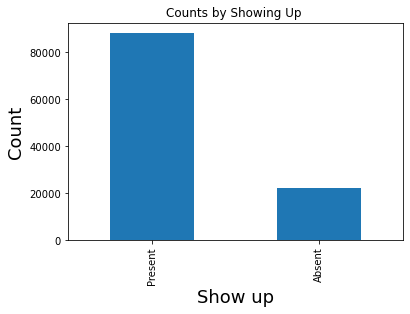

In [19]:
# Bar graph of Present and Absent patients

df['No_show'].value_counts().plot(kind='bar', title = 'Counts by Showing Up ')
plt.xlabel('Show up', fontsize=18)
plt.ylabel('Count', fontsize=18);

In [20]:
# Proportions of Absent and Present patients

(absent/(present + absent)*100, present/(present + absent)*100)

(20.192734018006604, 79.8072659819934)

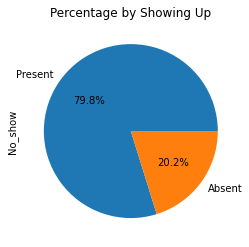

In [21]:
# Proportions plotted onto pie chart

df['No_show'].value_counts().plot(kind='pie', title = 'Percentage by Showing Up', autopct='%1.1f%%');

In conclusion, approximately 80% of appointments were obligated by the patient. 20% had no shows. 

### Research Question 2 - Is illness a factor on whether a patient will show up?

In [24]:
# The following creates a function which plots a bar graph for people present/absent at their appointments who 
# are getting treatment for their illness.

def Present_bar_plot(df, bygroup):
    df_by_Group = pd.crosstab(df[bygroup], df.No_show, normalize = 'index')
    df_by_Group = np.round((df_by_Group * 100), decimals=2)
    ax = df_by_Group.plot.bar(figsize=(10,5));
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:3.0f}%'.format(x) for x in vals]);
    ax.set_xticklabels(df_by_Group.index,rotation = 0, fontsize = 15);
    ax.set_title('\nShowUp vs. No ShowUp (%) (by ' + df_by_Group.index.name + ')\n', fontsize = 15)
    ax.set_xlabel(df_by_Group.index.name, fontsize = 12)
    ax.set_ylabel('(%)', fontsize = 12)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches

# The following are the data labels.

    for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2, 
                height + 2, 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 12)
    return df_by_Group

#### Alcoholism

/Users/rida2689/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


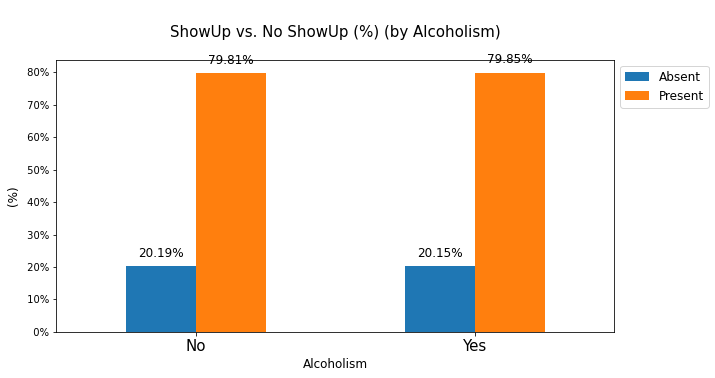

In [25]:
df_Alchl = Present_bar_plot(df, 'Alcoholism')

This shows that seeking treatment for alcoholism has no bearing for whether a patient will show up to their appointment

#### Hypertension

/Users/rida2689/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


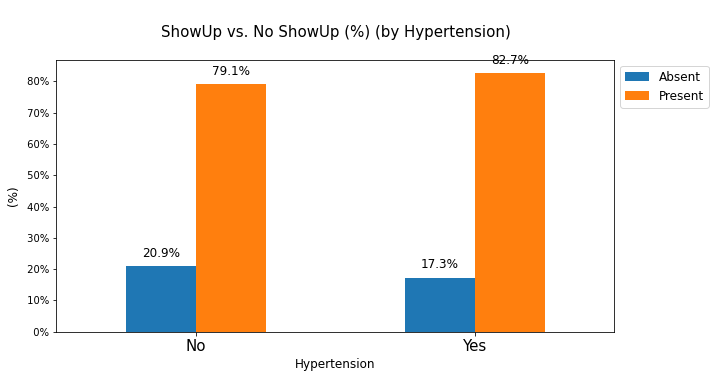

In [26]:
df_hyper = Present_bar_plot(df, 'Hypertension')

This shows that patients seeking treatment for Hypertension are slightly less at risk of not coming to their appointments

#### Diabetes

/Users/rida2689/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


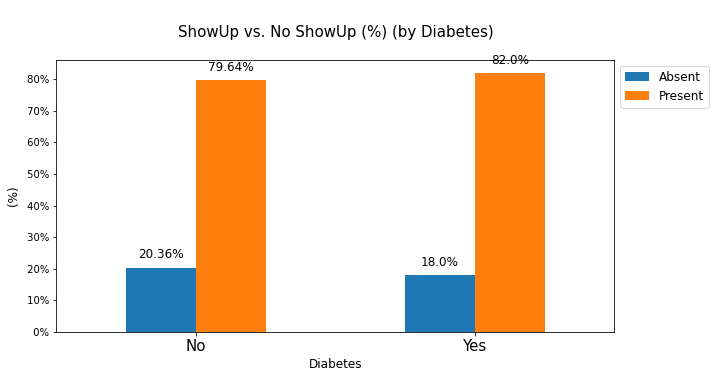

In [27]:
df_diab = Present_bar_plot(df, 'Diabetes')

The above graphs shows that patients seeking treatment for Diabetes are slightly less at risk of not attending their appointments. 

#### Handicap

/Users/rida2689/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


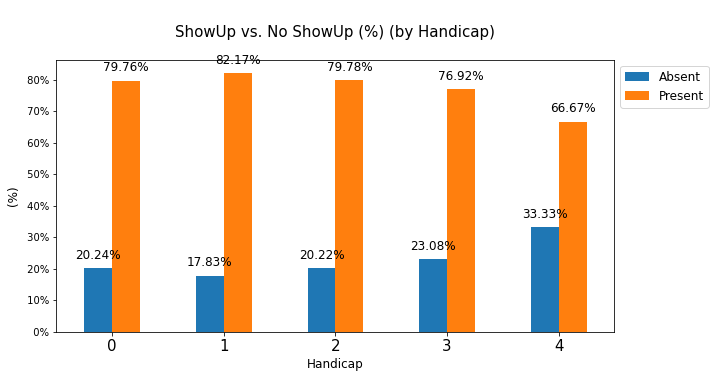

In [28]:
df_hancap = Present_bar_plot(df, 'Handicap')

The above graph shows that patients seeking treatment for handicap coded as 4 were most likely to be absent from their appointment. 

### Research 3: Do SMS Reminders work to avoid no-shows?

In [29]:
#bar chart and counts for sms recieved
df['SMS_received'].value_counts(normalize=True)

0    0.678958
1    0.321042
Name: SMS_received, dtype: float64

/Users/rida2689/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


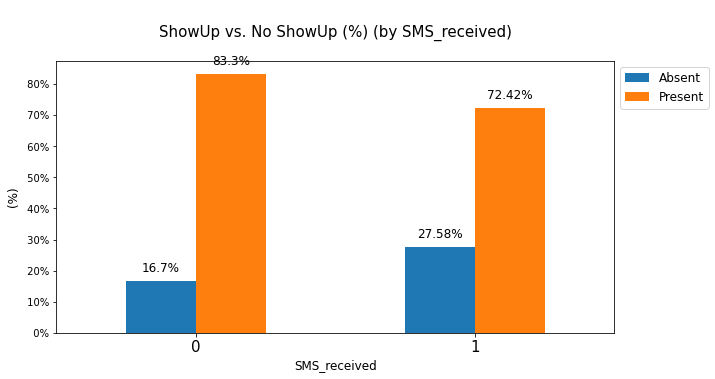

In [30]:
df_sms = Present_bar_plot(df, 'SMS_received')

This shows surprisingly that historically more appointments were missed where an SMS was sent out. 

<a id='conclusions'></a>
## Conclusions

In conclusion, approximately 80% of appointments were obligated by the patient. 20% had no shows. 

Of these 20% who were no shows:
  - 20% are seeking treatment for Alcoholism.
  - 17% are seeking treatment for Hypertension
  - 18% are seeking treatment for Diabetes
  - 33% are seeking treatment for Handicap (4)

The data also showed that, surprisingly, recieving an SMS reminder regarding their appointment had an adverse impact on whether they would attend the next day. 27.6% of appointments were missed when an SMS was sent, compared to 16.7% missed when not.

#### Limitations
The data provided is categorical, which means that visualisations were limited to pie charts and bar charts. Quantitative charts like histograms were excluded. 

It is not clear where this data has come from, i.e. who is responsible for collecting it. 

Some information about the columns of the dataset was inaccurate, for example, the Handicap is documented as being a True/Fasle column in the data description, however actually provides information about which Handicap, labelled from 0-4. 
